# Presidential Vote by County by Income Level
-----
I found a dataset of how each county voted in the 2016 election, and wanted to join it with data from the IRS that has county-level tax return information. I want to see what the trend really was like for voting at the county level, especially as compared to income. If I get a chance, or find another relevant dataest, I might also join this to congressional results by county-level and see if there is an income-based trend especially for places with close congressional races, or where the district split its presidential and congressional votes.

In [1]:
# Running cell of libraries to import
import pandas as pd
pd.options.display.max_rows = 200
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# I managed to erase my code for the ct dataframe

In [3]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

# This is from when I broke everything

In [139]:
# County-level pres vote
ct = pd.read_csv('../datasets/ct.csv',dtype={'FIPS':object})
# Load in income level data from IRS
cols = ['STATEFIPS','STATE','COUNTYFIPS','agi_stub','N1','NUMDEP','A00100','TCE','N02650','A02650']
dtype_dic = {'STATEFIPS':str,'STATE':str,'COUNTYFIPS':str}
inc = pd.read_csv('../datasets/14incyallagi.csv',dtype=dtype_dic)
inc.rename(columns = {'N1':'num_returns','NUMDEP':'num_dependents',
                     'A00100':'AGI','N02650':'num_tot_inc','A02650':'tot_inc_amt',}, inplace=True)
inc['FIPS'] = inc.STATEFIPS + inc.COUNTYFIPS
inc['people'] = inc.num_returns+inc.num_dependents
inc_fips = inc.groupby('FIPS').sum() # make a groupby b/c IRS summarizes by AGI stub
inc_fips['FIPS'] = inc_fips.index
descr = pd.read_csv('IRS_data_var_descriptions.csv')
descr_dict = {d['VARIABLENAME']: d['DESCRIPTION'] for d in descr.to_dict(orient='records')}

# Join dataframes together into a single presidential one

prescols = ['FIPS','countyname','state', 'clinton','trump','johnson',"ind_cand", 'mcmullin','total_votes', 
            'AGI','num_returns','num_dependents','num_tot_inc','tot_inc_amt','people']
pres_county = pd.merge(ct,inc_fips, on='FIPS') # helpfully, this takes care of my "state total" problem
pres_county['clinton_win'] = pres_county.clinton>pres_county.trump
pres = pres_county[prescols]
pres.to_csv('../datasets/president_counties.csv',index=False)
pres = pd.read_csv('../datasets/president_counties.csv',dtype={'FIPS':object})
pres['agi_per_person'] = pres.AGI/pres.people
pres['inc_per_person'] = pres.tot_inc_amt/pres.num_tot_inc
pres['turnout']=pres.total_votes/pres.people
pres['clinton_pct']=pres.clinton/pres.total_votes
pres['trump_pct'] = pres.trump/pres.total_votes
pres['ind_cand_pct']=pres.ind_cand/pres.total_votes
pres['clinton_margin'] = pres.clinton-pres.trump
pres['taxpayers_clinton'] = pres.clinton_pct*pres.num_returns
pres['taxpayers_trump'] = pres.trump_pct*pres.num_returns
pres['clinton_win'] = pres.clinton_margin>0
pres['County winner']=['Clinton' if x==True else 'Trump' for x in pres.clinton_win]

In [140]:
inc_fips.head()

,agi_stub,num_returns,mars1,MARS2,MARS4,PREP,N2,num_dependents,TOTAL_VITA,VITA,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,people,FIPS
FIPS,,,,,,,,,,,,,,,,,,,,,
01000,36,2046400.0,822280.0,765870.0,418380.0,1196960.0,4183470.0,1486080.0,45780.0,29720.0,...,21810.0,37075.0,28130.0,104788.0,354820.0,1648754.0,1607350.0,4832504.0,3532480.0,01000
01001,36,23820.0,9100.0,9960.0,4230.0,11260.0,50060.0,17910.0,510.0,150.0,...,110.0,91.0,150.0,415.0,4120.0,14000.0,18990.0,53147.0,41730.0,01001
01003,36,90890.0,37140.0,38890.0,12790.0,47460.0,179880.0,55660.0,1620.0,400.0,...,1240.0,1707.0,1630.0,4836.0,20450.0,108558.0,64600.0,180864.0,146550.0,01003
01005,36,9730.0,3540.0,3090.0,2980.0,6940.0,20300.0,7860.0,40.0,40.0,...,30.0,48.0,50.0,90.0,1360.0,4785.0,7990.0,24707.0,17590.0,01005
01007,36,7980.0,2760.0,3350.0,1720.0,4880.0,17320.0,6340.0,30.0,30.0,...,0.0,0.0,30.0,56.0,1130.0,5526.0,6600.0,19513.0,14320.0,01007


In [141]:
pres_county.head()

,FIPS,fips_county,countyname,Reporting,trump,clinton,johnson,Others,stein,Darrell Castle,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,people,clinton_win
0,02000,AK,"Alaska, AK",99.55,130415,93007,14593,0,4445,3156,...,6280.0,8691.0,7510.0,20891.0,93110.0,423804.0,251670.0,716625.0,570390.0,False
1,01107,"Pickens County, AL","Pickens, AL",100.00,5456,3972,49,46,19,0,...,0.0,0.0,40.0,152.0,1180.0,3655.0,6050.0,18890.0,13530.0,False
2,01007,"Bibb County, AL","Bibb, AL",100.00,6738,1874,124,66,17,0,...,0.0,0.0,30.0,56.0,1130.0,5526.0,6600.0,19513.0,14320.0,False
3,01079,"Lawrence County, AL","Lawrence, AL",100.00,10833,3627,250,88,31,0,...,30.0,24.0,50.0,147.0,2080.0,6493.0,11050.0,31151.0,22550.0,False
4,01115,"St. Clair County, AL","St. Clair, AL",100.00,31651,5589,684,346,130,0,...,180.0,230.0,260.0,459.0,6000.0,20343.0,28000.0,78071.0,59630.0,False


In [142]:
pres.head()

,FIPS,countyname,state,clinton,trump,johnson,ind_cand,mcmullin,total_votes,AGI,...,inc_per_person,turnout,clinton_pct,trump_pct,ind_cand_pct,clinton_margin,taxpayers_clinton,taxpayers_trump,clinton_win,County winner
0,02000,"Alaska, AK",AK,93007,130415,14593,23166,0,246588,24270413.0,...,68.275258,0.432315,0.377176,0.528878,0.093946,-37408,136201.914813,190983.181055,False,Trump
1,01107,"Pickens, AL",AL,3972,5456,49,114,0,9542,301640.0,...,40.679067,0.705248,0.416265,0.571788,0.011947,-1484,3134.474953,4305.562775,False,Trump
2,01007,"Bibb, AL",AL,1874,6738,124,207,0,8819,365681.0,...,46.397739,0.615852,0.212496,0.764032,0.023472,-4864,1695.716068,6096.976982,False,Trump
3,01079,"Lawrence, AL",AL,3627,10833,250,369,0,14829,601382.0,...,44.925537,0.657605,0.244588,0.730528,0.024884,-7206,3311.725673,9891.349383,False,Trump
4,01115,"St. Clair, AL",AL,5589,31651,684,1160,0,38400,1794459.0,...,51.635828,0.643971,0.145547,0.824245,0.030208,-26062,5127.616406,29038.144010,False,Trump


In [143]:
ct.head()

,FIPS,fips_county,countyname,Reporting,trump,clinton,johnson,Others,stein,Darrell Castle,...,Emidio Soltysik,Scott Copeland,Jerry White,Monica Moorehead,Richard Duncan,Peter Skewes,Rocky Giordani,total_votes,state,ind_cand
0,02000,AK,"Alaska, AK",99.55,130415,93007,14593,0,4445,3156,...,0,0,0,0,0,0,0,246588,AK,23166
1,01107,"Pickens County, AL","Pickens, AL",100.00,5456,3972,49,46,19,0,...,0,0,0,0,0,0,0,9542,AL,114
2,01007,"Bibb County, AL","Bibb, AL",100.00,6738,1874,124,66,17,0,...,0,0,0,0,0,0,0,8819,AL,207
3,01079,"Lawrence County, AL","Lawrence, AL",100.00,10833,3627,250,88,31,0,...,0,0,0,0,0,0,0,14829,AL,369
4,01115,"St. Clair County, AL","St. Clair, AL",100.00,31651,5589,684,346,130,0,...,0,0,0,0,0,0,0,38400,AL,1160


In [156]:
# sandbox for checking top values of various columns
dial = 'agi_per_person'
pres.sort_values(by=dial, ascending=True).head(20)

,FIPS,countyname,state,clinton,trump,johnson,ind_cand,mcmullin,total_votes,AGI,...,inc_per_person,turnout,clinton_pct,trump_pct,ind_cand_pct,clinton_margin,taxpayers_clinton,taxpayers_trump,clinton_win,County winner
2383,46102,"Oglala Lakota, SD",SD,2510,241,106,154,0,2905,117051.0,...,30.088776,0.296429,0.864028,0.082960,0.053012,2269,3395.628227,326.034423,True,Clinton
2340,46017,"Buffalo, SD",SD,296,171,18,23,0,490,20527.0,...,29.404225,0.291667,0.604082,0.348980,0.046939,125,428.897959,247.775510,True,Clinton
2392,46121,"Todd, SD",SD,1505,487,96,133,0,2125,87410.0,...,30.558131,0.324924,0.708235,0.229176,0.062588,1018,2053.882353,664.611765,True,Clinton
1512,28051,"Holmes, MS",MS,6689,1309,25,78,0,8076,212509.0,...,28.645273,0.536611,0.828257,0.162085,0.009658,5380,6253.337048,1223.743190,True,Clinton
360,13003,"Atkinson, GA",GA,697,1878,35,35,0,2610,91005.0,...,29.875974,0.414286,0.267050,0.719540,0.013410,-1181,825.183908,2223.379310,False,Trump
388,13061,"Clay, GA",GA,697,566,8,10,0,1273,31446.0,...,26.939831,0.586636,0.547526,0.444619,0.007855,131,646.080126,524.650432,True,Clinton
408,13101,"Echols, GA",GA,156,1007,13,19,0,1182,41017.0,...,30.248175,0.420641,0.131980,0.851946,0.016074,-851,182.131980,1175.685279,False,Trump
637,16033,"Clark, ID",ID,44,203,4,36,23,283,10150.0,...,32.015625,0.410145,0.155477,0.717314,0.127208,-159,49.752650,229.540636,False,Trump
2707,48427,"Starr, TX",TX,9289,2224,159,227,0,11740,776303.0,...,32.345938,0.228050,0.791227,0.189438,0.019336,7065,19218.893526,4601.444634,True,Clinton
1919,35031,"McKinley, NM",NM,13576,5104,2412,3023,173,21703,1037508.0,...,32.579078,0.321098,0.625536,0.235175,0.139289,8472,20192.290467,7591.444501,True,Clinton


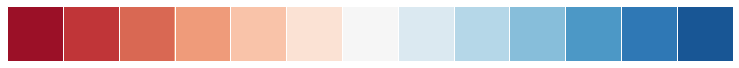

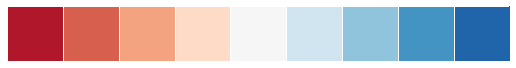

In [145]:
sns.palplot(sns.color_palette("RdBu", 13))
sns.palplot(sns.color_palette("RdBu", 9))

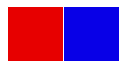

In [146]:
color_code = ['#e70000','#0800e7']
sns.set_palette(color_code)
sns.palplot(sns.color_palette())

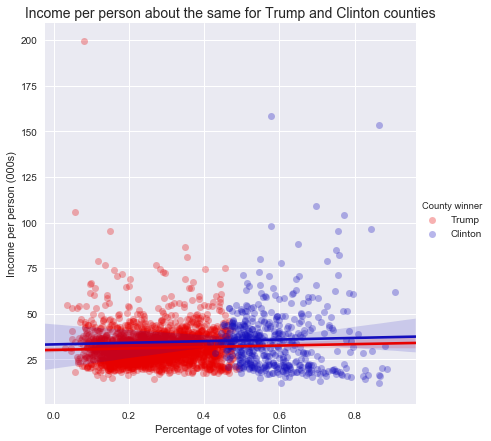

In [147]:
# x = pres.clinton
# ax = sns.regplot(x=x, y=y, marker="+")

# agi_pp = sns.FacetGrid(pres, hue='clinton_win', size=7.5,palette='RdBu')
# agi_pp.map(plt.scatter, 'clinton', 'agi_per_person').add_legend()
# agi_pp.ax.set_title('Clinton votes per individual gross income')

agi_pp = sns.lmplot(x='clinton_pct',y='agi_per_person',data=pres,hue='County winner',
                    palette=['#e70000','#140ebd'],size=6,scatter_kws={'alpha':0.3})
agi_pp.ax.set_title('Income per person about the same for Trump and Clinton counties',fontsize=14)
agi_pp.set(xlabel='Percentage of votes for Clinton', ylabel='Income per person (000s)')
agi_pp.savefig('../austinbrian.github.io/images/agi_pp_vs_clinton.png')

In [148]:
top_votes = pres.sort_values(by='total_votes',ascending=False).head(50)

In [149]:
clinton_lose = pres.clinton_win==False

In [19]:
clinton_win = pres.clinton_win
people_clinton_win = pres[clinton_win].people.sum()
people_clinton_lost = pres[clinton_lose].people.sum()
print people_clinton_win, people_clinton_lost

136242200.0 106693130.0


In [20]:
np.mean(pres.agi_per_person)

31.937467482006458

In [21]:
taxpayers_clinton_win = pres[clinton_win].num_returns.sum()
taxpayers_clinton_lost = pres[clinton_lose].num_returns.sum()
print taxpayers_clinton_win, taxpayers_clinton_lost

82267630.0 64781090.0


In [22]:
print pres.taxpayers_clinton.sum(), pres.taxpayers_trump.sum()

72049899.5493 66231346.7672


In [23]:
print pres[clinton_lose].FIPS.count(),pres[clinton_win].FIPS.count()

2623 490


In [125]:
pres[clinton_lose].FIPS.count()/pres.FIPS.count().astype(float)

0.8425955669771924

## Important features of taxpayers

In [24]:
descr= pd.read_csv('IRS_data_var_descriptions.csv')
descr_dict = {d['VARIABLENAME']: d['DESCRIPTION'] for d in descr.to_dict(orient='records')}
descr_dict

{'A00100': 'Adjust gross income (AGI) [4]',
 'A00101': 'Amount of AGI for itemized returns',
 'A00200': 'Salaries and wages amount',
 'A00300': 'Taxable interest amount',
 'A00600': 'Ordinary dividends amount',
 'A00650': 'Qualified dividends amount [5]',
 'A00700': 'State and local income tax refunds amount',
 'A00900': 'Business or professional net income (less loss) amount',
 'A01000': 'Net capital gain (less loss) amount',
 'A01400': 'Taxable individual retirement arrangements distributions amount',
 'A01700': 'Taxable pensions and annuities amount',
 'A02300': 'Unemployment compensation amount [6]',
 'A02500': 'Taxable Social Security benefits amount',
 'A02650': 'Total income amount',
 'A02900': 'Total statutory adjustments amount',
 'A03150': 'IRA payments amount',
 'A03210': 'Student loan interest deduction amount',
 'A03220': 'Educator expenses amount',
 'A03230': 'Tuition and fees deduction amount',
 'A03240': 'Domestic production activities deduction amount',
 'A03270': 'Sel

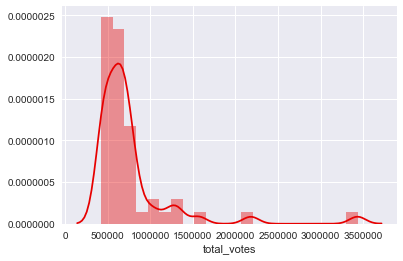

In [25]:
sns.distplot(top_votes['total_votes'])

In [26]:
inc_fips.columns[1:]

Index([u'num_returns', u'mars1', u'MARS2', u'MARS4', u'PREP', u'N2',
       u'num_dependents', u'TOTAL_VITA', u'VITA', u'TCE',
       ...
       u'N85530', u'A85530', u'N85300', u'A85300', u'N11901', u'A11901',
       u'N11902', u'A11902', u'people', u'FIPS'],
      dtype='object', length=125)

In [27]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split # in case I use this later but at first I won't
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
def evaluate_model(m):
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred,labels =[0,1])
    class_report = classification_report
    print m,'\n'
    print "Accuracy Score:\t{:0.3}".format(score.round(3)),'\n\n'
    crossval = cross_val_score(m, X, y,cv=10)
    print "Cross Val Scores:", crossval,'\n'
    print "Avg cross val:", np.mean(crossval),'\n'
    print "Predicted Totals:" # Predicted totals for all y
    for i,v in enumerate(np.bincount(y)):
        print "class "+str(i)+':' , v
    print "\nConfusion Matrix:"
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                         columns=['Predicted 1','Predicted 0'])
    print(confusion),'\n'
    print "Classification Report:"
    print(classification_report(y_test, y_pred, target_names=['Clinton Lose','Clinton Win']))

In [29]:
inc_fips.head()

,agi_stub,num_returns,mars1,MARS2,MARS4,PREP,N2,num_dependents,TOTAL_VITA,VITA,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,people,FIPS
FIPS,,,,,,,,,,,,,,,,,,,,,
01000,36,2046400.0,822280.0,765870.0,418380.0,1196960.0,4183470.0,1486080.0,45780.0,29720.0,...,21810.0,37075.0,28130.0,104788.0,354820.0,1648754.0,1607350.0,4832504.0,3532480.0,01000
01001,36,23820.0,9100.0,9960.0,4230.0,11260.0,50060.0,17910.0,510.0,150.0,...,110.0,91.0,150.0,415.0,4120.0,14000.0,18990.0,53147.0,41730.0,01001
01003,36,90890.0,37140.0,38890.0,12790.0,47460.0,179880.0,55660.0,1620.0,400.0,...,1240.0,1707.0,1630.0,4836.0,20450.0,108558.0,64600.0,180864.0,146550.0,01003
01005,36,9730.0,3540.0,3090.0,2980.0,6940.0,20300.0,7860.0,40.0,40.0,...,30.0,48.0,50.0,90.0,1360.0,4785.0,7990.0,24707.0,17590.0,01005
01007,36,7980.0,2760.0,3350.0,1720.0,4880.0,17320.0,6340.0,30.0,30.0,...,0.0,0.0,30.0,56.0,1130.0,5526.0,6600.0,19513.0,14320.0,01007


In [30]:
X_cols = inc_fips.columns[1:-1]
X = pres_county[X_cols]
y = pres_county.clinton_win
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = RandomForestClassifier()
# clf = DecisionTreeClassifier(max_depth=10)
# clf = AdaBoostClassifier()
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
evaluate_model(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 

Accuracy Score:	0.89 


Cross Val Scores: [ 0.86538462  0.88782051  0.89423077  0.90996785  0.90996785  0.90032154
  0.88424437  0.87459807  0.87459807  0.86173633] 

Avg cross val: 0.886286998104 

Predicted Totals:
class 0: 2623
class 1: 490

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           52           71
Actual 0           15          641 

Classification Report:
              precision    recall  f1-score   support

Clinton Lose       0.90      0.98      0.94       656
 Clinton Win       0.78      0.42      0.55       123

 avg / total       0.88      0.89      0.88       779



In [32]:
A09600_med = np.median(pres_county['A09600'])

In [33]:
A09600_med

417.0

In [34]:
trump_test = sum(pres_county.trump[pres_county['A09600']>A09600_med])
tot_test = sum(pres_county.total_votes[pres_county['A09600']>A09600_med])
float(trump_test)/float(tot_test)

0.4432691731634192

In [35]:
def trait_percentile(col=X,percentile=90):
    avg_clinton_per_trait = []
    avg_trump_per_trait = []
    ind_avg_per_trait = []
    for i in X.columns:
        trait_percentile = np.percentile(pres_county[i],percentile)
        county_above_percentile = pres_county[i]>trait_percentile
        clinton_vote = sum(pres_county.clinton[county_above_percentile])
        trump_vote = sum(pres_county.trump[county_above_percentile])
        ind_vote = sum((pres_county.total_votes[county_above_percentile]-
                        pres_county.clinton[county_above_percentile]-
                        pres_county.trump[county_above_percentile]))
        total_vote = sum(pres_county.total_votes[county_above_percentile])
        c = float(clinton_vote)/float(total_vote)
        t = float(trump_vote)/float(total_vote)
        i = float(ind_vote)/float(total_vote)
        avg_clinton_per_trait.append(c)
        avg_trump_per_trait.append(t)
        ind_avg_per_trait.append(i)
    return avg_clinton_per_trait,avg_trump_per_trait,ind_avg_per_trait

In [103]:
features = pd.DataFrame({'Feature':X.columns,
                         'Importance':np.round(clf.feature_importances_,6),
                        'Description': pd.Series(X.columns).map(descr_dict),
                        '% Clinton':trait_percentile(X,80)[0],'% Trump':trait_percentile(X,80)[1]})
features.sort_values(by='Importance',ascending=False)

,% Clinton,% Trump,Description,Feature,Importance
50,0.527065,0.410748,Number of returns with tuition and fees deduction,N03230,0.054240
107,0.525344,0.413157,Number of returns with refundable education cr...,N10960,0.053645
31,0.480150,0.454758,Number of farm returns,SCHF,0.038331
83,0.525386,0.412867,Number of returns with nonrefundable education...,N07230,0.031493
32,0.527663,0.410190,Number of returns with unemployment compensation,N02300,0.026453
51,0.527142,0.410792,Tuition and fees deduction amount,A03230,0.026133
92,0.525485,0.412815,Self-employment tax amount,A09400,0.025870
42,0.528961,0.409053,Number of returns with self-employment retirem...,N03300,0.024909
99,0.524173,0.414184,Number of returns with total tax payments,N10600,0.024192
64,0.528301,0.409467,Taxes paid amount,A18300,0.019412


In [122]:
features.shape

(124, 5)

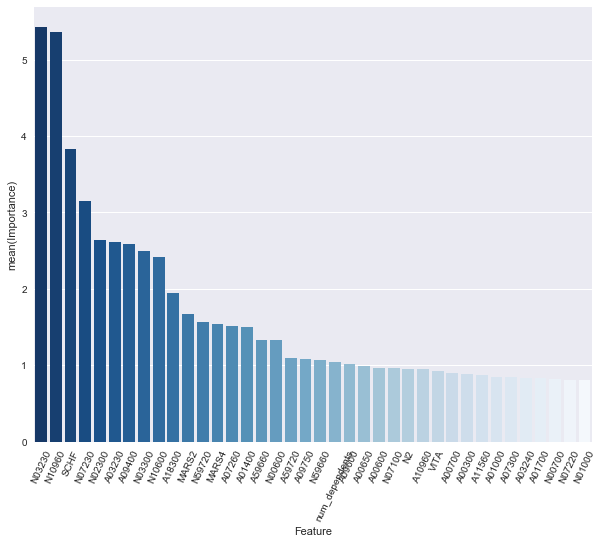

In [120]:
plt.figure(figsize = (10,8))
disp_features = features[features.Importance>np.mean(features.Importance)].sort_values(by='Importance',ascending=False)
disp_features['Importance'] /=1e-2
feat_plot = sns.barplot(x='Feature',y='Importance',data=disp_features,color='% Clinton',palette='Blues_r')
# plt.xticks(features, features.Description, rotation=65)
plt.setp(feat_plot.get_xticklabels(), rotation=65)
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
coef = lr.coef_

In [100]:
lr.score(X,y)

0.89559910054609704

In [101]:
features = pd.DataFrame({'Feature':X.columns,
                         'Coefs':np.exp(coef),                        
                        'Description': pd.Series(X.columns).map(descr_dict),
                        '% Clinton':trait_percentile(X,90)[0],
                         '% Trump':trait_percentile(X,90)[1]})
features.sort_values(by='Coefs',ascending=False)

,% Clinton,% Trump,Coefs,Description,Feature
1,0.557095,0.381532,1.000068,NaN,mars1
33,0.559517,0.378480,1.000045,Unemployment compensation amount [6],A02300
102,0.556979,0.382764,1.000032,Earned income credit amount [7],A59660
104,0.556924,0.382844,1.000031,Excess earned income credit (refundable) amoun...,A59720
99,0.555545,0.383121,1.000030,Number of returns with total tax payments,N10600
24,0.556458,0.382366,1.000029,Business or professional net income (less loss...,A00900
13,0.555386,0.383316,1.000026,Number of returns with salaries and wages,N00200
0,0.555327,0.383339,1.000025,NaN,num_returns
71,0.554267,0.384360,1.000024,Number of returns with income tax before credits,N05800
69,0.554267,0.384360,1.000024,Number of returns with taxable income,N04800


In [121]:
pres_county.shape

(3113, 159)